# Competition

In [46]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# from sklearn.impute import other imputers?

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


## 0.Preparing the data 

In [47]:
train_data = pd.read_csv("housing-classification-iter6.csv")
test_data = pd.read_csv("test-housing-classification.csv")
#for later upload
    # results needs only two columns, "Id" (as Index) and "Expensive"
# resulting_df.to_csv("name.csv",index = False)
# Fro submition I have to input the name "Manuel"

In [48]:
train_data.shape, test_data.shape


((1460, 81), (1459, 80))

# 1. Training the models

## 1.1. data exploration for training data

<AxesSubplot: >

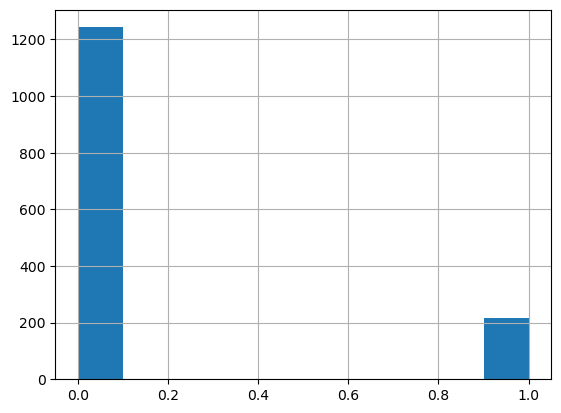

In [5]:
# Checking data distribution for target data

train_data["Expensive"].hist()

In [6]:
train_data["Expensive"].value_counts()

0    1243
1     217
Name: Expensive, dtype: int64

In [7]:
distribution_score = 1 - 217/1243
distribution_score 

0.825422365245374

In [8]:
max_distr_score = 1243/(217 + 1243)
max_distr_score

0.8513698630136987

## 1.b. Data reduction

### 1. Exploring feature correlations with target data

In [9]:
# different scales for correlating later

from sklearn.preprocessing import MinMaxScaler


train_data_num = train_data.select_dtypes('number')
            # 1. initialize the transformer (optionally, set parameters for the scale)
my_min_max = MinMaxScaler(feature_range=(-1,1))

            # . fit the transformer to the data (matching the scale with each column's max and min)
df_scaled = my_min_max.fit_transform(train_data_num)

train_data_num_scale = pd.DataFrame(df_scaled, # index=df_audio_features.index, 
                           columns=train_data_num.columns)
train_data_num_scale.head(3)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,-0.933160,-0.698630,-0.719804,-0.25,-1.000000,-1.0,0.0,-1.000000,-1.0,-1.0,...,0.000000,0.872727,-0.227080,-0.776965,-1.0,-1.0,-1.0,-0.818182,0.0,-1.000000
1,-0.922410,-0.595890,-0.586907,-0.25,-0.333333,-1.0,0.0,-0.304551,-1.0,-1.0,...,-0.333333,0.381818,-0.351199,-1.000000,-1.0,-1.0,-1.0,-0.272727,-0.5,-0.998629
2,-0.906985,-0.678082,-0.698854,-0.25,-0.333333,-1.0,0.0,-1.000000,-1.0,-1.0,...,-0.333333,0.836364,-0.142454,-0.846435,-1.0,-1.0,-1.0,0.454545,0.0,-0.997258


(<AxesSubplot: >,
                Expensive
 LotArea         0.207233
 LotFrontage     0.269355
 TotalBsmtSF     0.467167
 BedroomAbvGr    0.075514
 Fireplaces      0.343523
 PoolArea        0.033286
 GarageCars      0.460152
 WoodDeckSF      0.259138
 ScreenPorch     0.069669
 Expensive       1.000000
 MSSubClass     -0.080218
 OverallQual     0.591136
 OverallCond    -0.082821
 YearBuilt       0.329442
 YearRemodAdd    0.336155
 MasVnrArea      0.385162
 BsmtFinSF1      0.315770
 BsmtFinSF2     -0.032944
 BsmtUnfSF       0.149911
 1stFlrSF        0.468795
 2ndFlrSF        0.204820
 LowQualFinSF   -0.027581
 GrLivArea       0.512482
 BsmtFullBath    0.199329
 BsmtHalfBath   -0.044249
 FullBath        0.343958
 HalfBath        0.145223
 KitchenAbvGr   -0.088351
 TotRmsAbvGrd    0.388254
 GarageYrBlt     0.328413
 GarageArea      0.476036
 OpenPorchSF     0.251542
 EnclosedPorch  -0.076329
 3SsnPorch       0.011505
 MiscVal        -0.012762
 MoSold          0.059233
 YrSold         -0.0

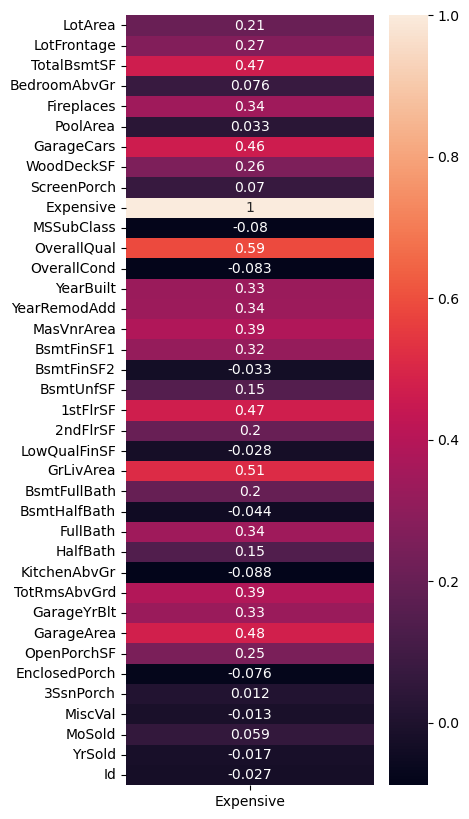

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#checking for correlations
target_feat_corr = pd.DataFrame(train_data_num_scale.corr().Expensive)

plt.figure(figsize=(4, 10))
sns.heatmap(target_feat_corr, annot=True), target_feat_corr

In [11]:
train_num_sc_red = train_data_num_scale.copy()
train_num_sc_red.shape[1], train_num_sc_red.columns

(38,
 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
        'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
        'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
        'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
        'MoSold', 'YrSold', 'Id'],
       dtype='object'))

In [12]:
drop_list = []
for k in range(len(target_feat_corr)):
    # print(f"The index {target_feat_corr.index[k]} has he value {target_feat_corr.iloc[k,0]} and rting value is {abs(target_feat_corr.iloc[k,0])}")
    if abs(target_feat_corr.iloc[k,0]) < 0.3:
        drop_list.append(target_feat_corr.index[k])

drop_list

['LotArea',
 'LotFrontage',
 'BedroomAbvGr',
 'PoolArea',
 'WoodDeckSF',
 'ScreenPorch',
 'MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Id']

In [13]:
train_num_sc_red.drop(drop_list, axis=1, inplace=True)
train_num_sc_red.shape[1], train_num_sc_red.columns

(15,
 Index(['TotalBsmtSF', 'Fireplaces', 'GarageCars', 'Expensive', 'OverallQual',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF',
        'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'],
       dtype='object'))

In [14]:
train_drop_data = train_data.copy()
train_drop_data.shape[1], train_drop_data.columns

(81,
 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
        'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
        'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
        'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
        'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
        'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
        'MoSold', 'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exter

In [15]:
train_drop_data.drop(drop_list, axis=1, inplace=True)
train_drop_data.shape[1], train_drop_data.columns

(58,
 Index(['TotalBsmtSF', 'Fireplaces', 'GarageCars', 'Expensive', 'MSZoning',
        'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'OverallQual',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF',
        'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
        'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
       dtype='object'))

In [18]:
drop_list_2 = ["GarageQual","PavedDrive","SaleCondition","MiscFeature"]

In [19]:
train_drop_data.drop(drop_list_2, axis=1, inplace=True)
train_drop_data.shape[1], train_drop_data.columns

(54,
 Index(['TotalBsmtSF', 'Fireplaces', 'GarageCars', 'Expensive', 'MSZoning',
        'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'OverallQual',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF',
        'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional', 'GarageType',
        'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'SaleType'],
       dtype='object'))

## 2. Making a pipeline - trying different algorithms

In [20]:
X = train_drop_data   # train_data
y = X.pop("Expensive")

In [21]:
# data_Splitting

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31416)

In [23]:
(X_train.columns == X_test.columns).all()

True

## 2.1. DecisionTree

In [25]:
# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(drop="first", handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)



        # full pipeline

from sklearn.tree import DecisionTreeClassifier

dtree_full_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier())

        # cross validation

from sklearn.model_selection import GridSearchCV

param_grid = {"columntransformer__num_pipe__simpleimputer__strategy":["median", "mean"],
              "columntransformer__cat_pipe__onehotencoder__drop":["first", "if_binary"],
              "columntransformer__cat_pipe__onehotencoder__handle_unknown":["ignore","infrequent_if_exist"],
              "decisiontreeclassifier__max_depth": range(2, 14, 2),
              "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

dtree_search = GridSearchCV(dtree_full_pipeline, # your pipeline
                      param_grid,                # parameters to check
                      cv=5,
                      verbose=1)

dtree_search.fit(X, y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\manu_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [7, 25, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\manu_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [9, 30, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\manu_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [21, 27, 32] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\manu_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [17, 21, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\manu_\anaconda3\lib\site-packages\sklearn\preprocessing\_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['TotalBsmtSF', 'Fireplaces', 'GarageCars', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'...
             param_grid={'columntransformer__cat_pipe__onehotencoder__drop': ['first',
                                                                              'if_binary'],
                         'columntransformer__cat_pipe__onehotencoder__handle_unknown': ['ignore',
                                                

In [26]:
############## checking results
scores = {"dtree" : dtree_search.best_score_}

scores, dtree_search.best_params_

({'dtree': 0.9267123287671233},
 {'columntransformer__cat_pipe__onehotencoder__drop': 'first',
  'columntransformer__cat_pipe__onehotencoder__handle_unknown': 'ignore',
  'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
  'decisiontreeclassifier__max_depth': 4,
  'decisiontreeclassifier__min_samples_leaf': 3})

### 2.2.2 second Decision_tree-Model after CV

In [41]:
# building optimised pipeline
# building the pipeline

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(drop="first", handle_unknown="ignore") )

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

        # full pipeline
dtree_full_pipeline2 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 7))

In [81]:
# checking results on training data for overfitting
dtree_full_pipeline2.fit(X_train, y_train)
y_dtree_pipe2 = dtree_full_pipeline2.predict(X_train)
accuracy_score(y_train, y_dtree_pipe2)

0.954337899543379

In [43]:
# testing training data on test data
dtree_full_pipeline2.fit(X_train, y_train)
y_dtree_pipe2 = dtree_full_pipeline2.predict(X_test)
accuracy_score(y_test, y_dtree_pipe2)

C:\Users\manu_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2, 7, 25, 32, 38, 40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9260273972602739

## 2.2. K Nearest Neighbours

In [27]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### 2.2.1. First KNN-Model

In [28]:
# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)
# the sparse=False parameter is necessary to avoid the sparse matrix
# so the scaler gets an array for input instead of a sparese matrix which it cannot compute on.
# https://stackoverflow.com/questions/69594983/error-when-scaling-features-for-clustering-in-python-and-sklearn

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# full pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

knn_full_pipeline = make_pipeline(preprocessor,
                                  StandardScaler(),
                                  KNeighborsClassifier()
                                 )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "standardscaler":[StandardScaler(), MinMaxScaler(), RobustScaler(), 'paththrough']
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X, y)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


C:\Users\manu_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\manu_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['TotalBsmtSF', 'Fireplaces', 'GarageCars', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'...
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                           

In [29]:
#### checking results
scores["knn"] = knn_search.best_score_
scores, knn_search.best_params_

({'dtree': 0.9267123287671233, 'knn': 0.9452054794520549},
 {'columntransformer__num_pipe__simpleimputer__strategy': 'median',
  'kneighborsclassifier__n_neighbors': 10,
  'kneighborsclassifier__weights': 'distance',
  'standardscaler': RobustScaler()})

### 2.2.2 second KNN-Model after CV

In [33]:
# building optimised pipeline
# building the pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)
# the sparse=False parameter is necessary to avoid the sparse matrix
# so the sclaer gets an array for input instead of a sparese matrix which it cannot compute on.
# https://stackoverflow.com/questions/69594983/error-when-scaling-features-for-clustering-in-python-and-sklearn

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),  ] )

    # combining the full pipeline
knn_full_pipeline2 = make_pipeline(preprocessor,
                                  RobustScaler(),
                                  KNeighborsClassifier(n_neighbors=10, weights="distance")
                                 )

In [75]:
# checking results on training data for overfitting
knn_full_pipeline2.fit(X_train, y_train)

y_knn_pipe2 = knn_full_pipeline2.predict(X_train)
accuracy_score(y_train, y_knn_pipe2)

1.0

In [32]:
# checking results on test data with CV suggestion for n_neighbors
knn_full_pipeline2.fit(X_train, y_train)
y_knn_pipe2 = knn_full_pipeline2.predict(X_test)
accuracy_score(y_test, y_knn_pipe2)

NameError: name 'knn_full_pipeline2' is not defined

In [85]:
# checking results on test data with n_neighbors = 6 instead of CV suggestion
knn_full_pipeline2.fit(X_train, y_train)
y_knn_pipe2 = knn_full_pipeline2.predict(X_test)
accuracy_score(y_test, y_knn_pipe2)

0.9424657534246575

In [48]:
knn_full_pipeline2.fit(X_train, y_train)
y_knn_pipe2 = knn_full_pipeline2.predict(X_test)
accuracy_score(y_test, y_knn_pipe2)

0.9397260273972603

### 2.2.3. Importing results

In [34]:
knn_full_pipeline2.fit(X, y)
y_test_knn2 = knn_full_pipeline2.predict(test_data)
y_test_knn2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
deliver5 = pd.DataFrame()
deliver5["Id"]=  test_data.Id
deliver5["Expensive"] = y_test_knn2
deliver5.set_index("Id", inplace=True)

In [36]:
deliver5

,Expensive
Id,
1461,0
1462,0
1463,0
1464,0
1465,0
...,...
2915,0
2916,0
2917,0


In [37]:
deliver5.to_csv("z.Manuel5-2_KNN_ONEH_after_CV.csv")

## 2.3. Support Vector Machines

### 2.3.1. First SVC-Model

In [38]:
from sklearn.svm import SVC

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)

preprocessor6 = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# full pipeline


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

svc_full_pipeline = make_pipeline(preprocessor6,
                                  StandardScaler(),
                                  SVC()
                                 )
from sklearn.model_selection import GridSearchCV

param_grid = {
    # "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "standardscaler":[StandardScaler(), MinMaxScaler(), RobustScaler()], # , 'paththrough'],
    "svc__C": range(2, 40),
    "svc__kernel":["sigmoid","poly","rbf"],  # ,"precomputed"],
    # "svc__probability":["bool", "False"],
    # "svc__gamma":["auto", "scale"],
    "svc__random_state":[31245]
    
}

svc_search = GridSearchCV(svc_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

svc_search.fit(X, y)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['TotalBsmtSF', 'Fireplaces', 'GarageCars', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'...
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageCond', 'PoolQC', 'Fence', 'SaleType'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'standar

In [ ]:
# ({'dtree': 0.9269406392694064,
#   'knn': 0.9388127853881277,
#   'svc': 0.9205479452054794},
#  {'svc__C': 31, 'svc__kernel': 'rbf', 'svc__random_state': 31245})

In [39]:
scores["svc"] = svc_search.best_score_

scores, svc_search.best_params_

({'dtree': 0.9267123287671233,
  'knn': 0.9452054794520549,
  'svc': 0.9575342465753426},
 {'standardscaler': RobustScaler(),
  'svc__C': 2,
  'svc__kernel': 'rbf',
  'svc__random_state': 31245})

In [87]:
svc_full_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'svc', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num_pipe', 'columntransformer__cat_pipe', 'columntransformer__num_pipe__memory', 'columntransformer__num_pipe__steps', 'columntransformer__num_pipe__verbose', 'columntransformer__num_pipe__simpleimputer', 'columntransformer__num_pipe__simpleimputer__add_indicator', 'columntransformer__num_pipe__simpleimputer__copy', 'columntransformer__num_pipe__simpleimputer__fill_value', 'columntransformer__num_pipe__simpleimputer__missing_values', 'columntransformer__num_pipe__simpleimputer__strategy', 'columntransformer__num_pipe__simpleimputer__verbose', 'columntransformer__cat_pipe__memory', 'columntransformer__cat_pipe__steps', 'columntrans

### 2.3.3 second SVC-Model after CV

In [40]:
# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)


preprocessor6 = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# full pipeline

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

svc_full_pipeline2 = make_pipeline(preprocessor6,
                                  RobustScaler(), # StandardScaler(), # MinMaxScaler()
                                  SVC(C=2, kernel="rbf", random_state=31245)
                                 )

In [111]:
# checking results on train data
svc_full_pipeline2.fit(X_train, y_train)
y_svc_pipe2 = svc_full_pipeline2.predict(X_train)
accuracy_score(y_train, y_svc_pipe2)

0.9351598173515981

In [91]:
# checking results on test data with prior CV suggestion
# svc_full_pipeline2.fit(X_train, y_train)
# y_svc_pipe2 = svc_full_pipeline2.predict(X_test)
# accuracy_score(y_test, y_svc_pipe2)

0.9315068493150684

In [127]:
# # checking results on test data with MinMaxScaler
# svc_full_pipeline2.fit(X_train, y_train)
# y_svc_pipe2 = svc_full_pipeline2.predict(X_test)
# accuracy_score(y_test, y_svc_pipe2)

# ## This one Overfitted!

0.9424657534246575

In [120]:
# checking results on test data with CV suggestion Standard Scaler
svc_full_pipeline2.fit(X_train, y_train)
y_svc_pipe2 = svc_full_pipeline2.predict(X_test)
accuracy_score(y_test, y_svc_pipe2)

0.9397260273972603

In [104]:
# checking results on test data with CV suggestion
svc_full_pipeline2.fit(X_train, y_train)
y_svc_pipe2 = svc_full_pipeline2.predict(X_test)
accuracy_score(y_test, y_svc_pipe2)

0.9397260273972603

In [93]:
# svc_search.fit(X_train, y_train)
# y_svc_pipe = svc_search.predict(X_test)
# accuracy_score(y_test, y_svc_pipe)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.9315068493150684

### 2.3.3. Importing results

In [41]:
svc_full_pipeline2.fit(X, y)
y_svc_pipe2 = svc_full_pipeline2.predict(test_data)
y_svc_pipe2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
deliver6 = pd.DataFrame()
deliver6["Id"]=  test_data.Id
deliver6["Expensive"] = y_svc_pipe2
deliver6.set_index("Id", inplace=True)

In [43]:
deliver6

,Expensive
Id,
1461,0
1462,0
1463,0
1464,0
1465,0
...,...
2915,0
2916,0
2917,0


In [44]:
deliver6.to_csv("z.Manuel6_SVC_ONEH_after_CV.csv")

In [45]:
scores

{'dtree': 0.9267123287671233,
 'knn': 0.9452054794520549,
 'svc': 0.9575342465753426}

## 2.4. Random Forests 

In [129]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

### 2.4.1. RandomForestClassifier - Model

In [134]:
# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)
# the sparse=False parameter is necessary to avoid the sparse matrix
# so the sclaer gets an array for input instead of a sparese matrix which it cannot compute on.
# https://stackoverflow.com/questions/69594983/error-when-scaling-features-for-clustering-in-python-and-sklearn

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# full pipeline

rfc_full_pipeline = make_pipeline(preprocessor,
                                  # StandardScaler(),
                                  RandomForestClassifier()
                                 )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "standardscaler":[StandardScaler(), MinMaxScaler(), 'paththrough'], #  RobustScaler(),
    "randomforestclassifier__n_estimators": range(30, 180, 20),
    "randomforestclassifier__criterion": ["gini","entropy"], # "log_loss"],
    "randomforestclassifier__max_depth": range(3,12,3),
    "randomforestclassifier__min_samples_split": range(6,23,8),
    "randomforestclassifier__min_samples_leaf": range(2,24,6),  
    # "randomforestclassifier__bootstrap":[True, False], 
    # "randomforestclassifier__oob_score":[True, False], # reated to bootstrap =True 
    # "randomforestclassifier__max_samples": range(30, 50, 7)  # reated to bootstrap =True 
}

rfc_search = GridSearchCV(rfc_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

rfc_search.fit(X_train, y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


C:\Users\manu_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
103680 fits failed out of a total of 103680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20736 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manu_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manu_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\manu_\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\m

ValueError: could not convert string to float: 'RM'

In [131]:
rfc_full_pipeline2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'randomforestclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num_pipe', 'columntransformer__cat_pipe', 'columntransformer__num_pipe__memory', 'columntransformer__num_pipe__steps', 'columntransformer__num_pipe__verbose', 'columntransformer__num_pipe__simpleimputer', 'columntransformer__num_pipe__simpleimputer__add_indicator', 'columntransformer__num_pipe__simpleimputer__copy', 'columntransformer__num_pipe__simpleimputer__fill_value', 'columntransformer__num_pipe__simpleimputer__missing_values', 'columntransformer__num_pipe__simpleimputer__strategy', 'columntransformer__num_pipe__simpleimputer__verbose', 'columntransformer__cat_pipe__memory', 'columntransformer__cat_pipe__s

In [ ]:
#### checking results
scores["rfc"] = rfc_search.best_score_
scores, rfc_search.best_params_

### 2.4.2 second RandomForestClassifier - Model after CV

In [130]:
# building optimised pipeline
# building the pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)
# the sparse=False parameter is necessary to avoid the sparse matrix
# so the sclaer gets an array for input instead of a sparese matrix which it cannot compute on.
# https://stackoverflow.com/questions/69594983/error-when-scaling-features-for-clustering-in-python-and-sklearn

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),  ] )

    # combining the full pipeline
rfc_full_pipeline2 = make_pipeline(preprocessor,
                                  StandardScaler(),
                                  RandomForestClassifier()
                                 )

In [75]:
# checking results on training data for overfitting
rfc_full_pipeline2.fit(X_train, y_train)
y_rfc_pipe2 = rfc_full_pipeline2.predict(X_train)
accuracy_score(y_train, y_rfc_pipe2)

1.0

In [83]:
# checking results on test data with CV suggestion for n_neighbors
rfc_full_pipeline2.fit(X_train, y_train)
y_rfc_pipe2 = rfc_full_pipeline2.predict(X_train)
accuracy_score(y_test, y_rfc_pipe2)

0.9315068493150684

In [85]:
# checking results on test data with n_neighbors = 6 instead of CV suggestion
rfc_full_pipeline2.fit(X_train, y_train)
y_rfc_pipe2 = rfc_full_pipeline2.predict(X_train)
accuracy_score(y_test, y_rfc_pipe2)

0.9424657534246575

In [48]:
rfc_full_pipeline2.fit(X_train, y_train)
y_rfc_pipe2 = rfc_full_pipeline2.predict(X_train)
accuracy_score(y_test, y_rfc_pipe2)

0.9397260273972603

### 2.2.3. Importing results

In [71]:
knn_full_pipeline2.fit(X, y)
y_test_knn2 = knn_full_pipeline2.predict(test_data)
y_test_knn2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
deliver7 = pd.DataFrame()
deliver7["Id"]=  test_data.Id
deliver7["Expensive"] = y_test_knn2
deliver7.set_index("Id", inplace=True)

In [73]:
deliver7

,Expensive
Id,
1461,0
1462,0
1463,0
1464,0
1465,0
...,...
2915,0
2916,0
2917,0


In [74]:
deliver7.to_csv("z.Manuel7_RanFor_ONEH_after_CV.csv")